# ChaosCrypto.jl

#### Autores: 
- [Yuriko Yamamoto](https://github.com/Yuriyama "Yuriyama")
- [David Amaro Alcalá](https://github.com/davidamaro "davidamaro")
- [Ignacio Vargas](https://github.com/ignacio-vc "ignacio-vc")

## Uso del caos para transmitir mensajes encriptados (utilizando Integración con Taylor)

La teoría del caos es un tema muy amplio, pero en general, sabemos que implica alta sensibilidad a condiciones iniciales. Por esto, no es posible predecir su comportamiento.
Sin embargo, Cuomo y Oppenheim publicaron un artículo en el cual explican cómo el caos puede ser utilizado para la encripción de mensajes.

Este tipo de encripción se basa en el caos sincronizado explicado por Pecora y Carroll. El caos sincronizado se presenta cuando una parte del *output* de un sistema caótico se usa como *input* de otro sistema caótico. Si ambos sistemas se sincronizan apropiadamente, el segundo sistema se comportará igual que el primero.

Los sistemas que sirven para la encriptación de mensajes son los sistemas caóticos que tienen la propiedad de auto sincronizarse. Un sistema caótico posee esta propiedad si puede descomponerse en dos subsistemas, un transmisor y un receptor. El sistema de Lorenz es uno de los sistemas que mejor cumple con esta propiedad, por ello, es el que se usará en los ejercicios.

### Ecuaciones de Lorenz

$\frac{dx}{dt}= \sigma (y - x)$

$\frac{dy}{dt} = rx -y -xz$

$\frac{dz}{dt} = xy -bz$

Si $x(t)$ es la señal que se transmite.
Lo que se recibe es:

$x_r(t) = x(t)$

$\dot{y_r} = rx(t) -y_r -x(t)z_r$

$\dot{z_r} = x(t)y_r -bz_r$

Las ecuaciones de quien recibe el mensaje son:

$x_r = \sigma(y_r - x_r)$ 
    
$y_r = ρs(t) - y_r - s(t)z_r$
            
$z_r = s(t)y_r - \beta z_r$


donde

$s(t) = x(t) + m(t)$

y 

$m(t) = sin(t)$

Con parámetros base:

ρ = 60

σ = 10

β = $\frac{8}{3}$ 

El módulo que utilizamos para los ejercicios es "ChaosCrypto.jl" en la carpeta "src".
En ese módulo se incluyen además otro conjunto de módulos que contienen las funciones necesarias para integrar.
Estos módulos son:
 - Automata.jl
 - Lorenz.jl
 - RK4.jl

### 9.6.2 (Pecora and Carroll’s approach) 
In the pioneering work of Pecora and Carroll (1990), one of the receiver variables is simply set equal to the corresponding transmitter variable.  
For instance, if $x(t)$ is used as the transmitter drive signal, then the receiver equations are

$x(t) = x(t)$  
$\dot{y_r} = [rx(t)] - [y_r] - [x(t)z_r]$  
$\dot{z_r} = [x(t)y_r] - [bz_r]$  

where the first equation is not a differential equation. Their numerical simulations and a heuristic argument suggested that  
$y_r(t) → y(t)$ and $z_r(t) → z(t)$ as $t → ∞$ even if there were differences in the initial conditions.  

### 9.6.3 (Computer experiments on synchronized chaos) 
Let $x, y, z$ be governed by the Lorenz equations with $r = 60, σ = 10, b = 8/3$.  
Let $x_r, y_r, z_r$ be governed by the system in Exercise 9.6.2.  
Choose different initial conditions for $y$ and $y_r$, and similarly for $z$ and $z_r$, and then start integrating numerically.  

a) Plot $y(t)$ and $y_r(t)$ on the same graph. With any luck, the two time series should eventually merge, even though both are chaotic.  
b) Plot the $(y,z)$ projection of both trajectories.

In [2]:
;cd ../test

/Users/Yuriko/ChaosCrypto.jl/test


In [3]:
using Interact
#Este paquete permite usar sliders, botones, etc.

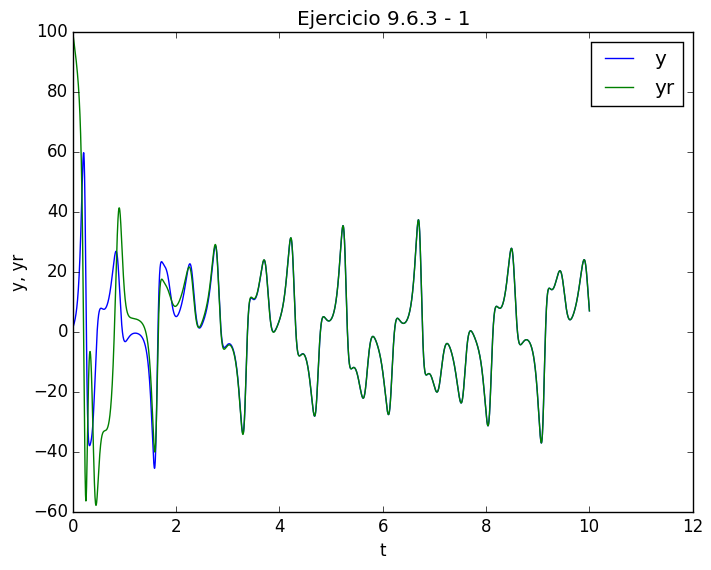

In [4]:
include("testejercicio11.jl")

Se observa que a pesar de ser ambos caóticos, se sincronizan un poco después de *t = 2*.

In [ ]:
La siguiente es la gráfica correspondiente a la proyección (y, z) de la curva.

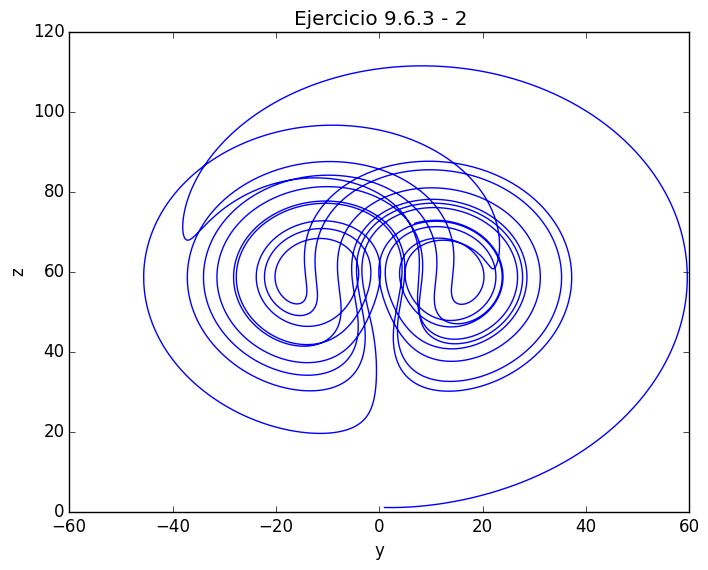

/usr/local/lib/python2.7/site-packages/matplotlib/axes/_axes.py:475: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [5]:
include("testejercicio12.jl")

### 9.6.4 (Some drives don’t work) 
Suppose $z(t)$ were the drive signal in Exercise 9.6.2, instead of $x(t)$. In other words, we replace $z_r$ by $z(t)$ everywhere in the receiver equations, and watch how $x_r$ and $y_r$ evolve.

a) Show numerically that the receiver does not synchronize in this case.  
b) What if $y(t)$ were the drive?

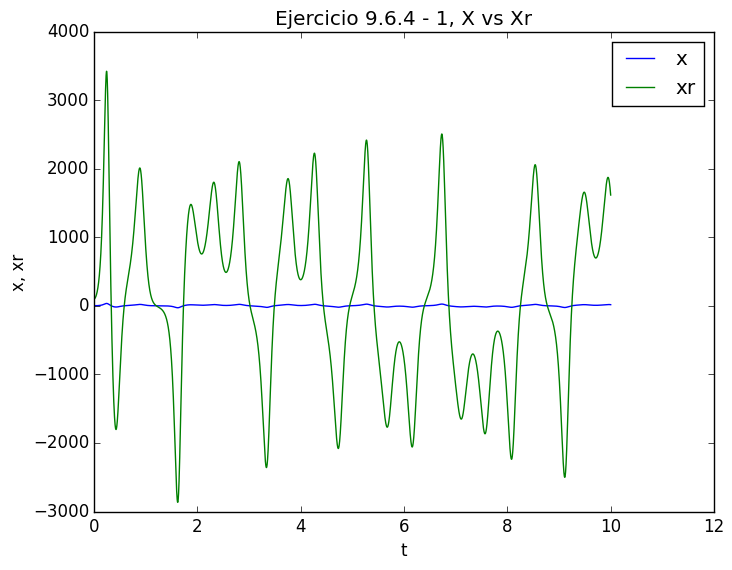

In [6]:
include("testejercicio21-xxr.jl")

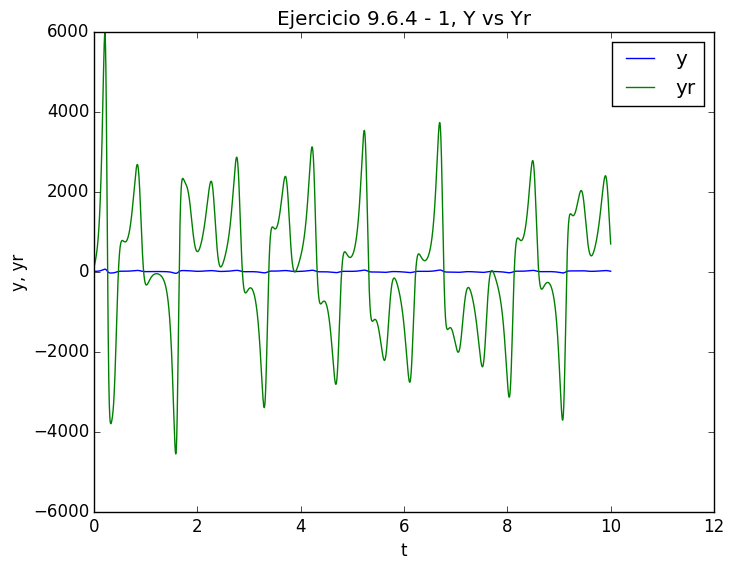

In [7]:
include("testejercicio21-yyr.jl")

Aquí se prueba que el receptor no se sincroniza con el transmisor al paso del tiempo pues tanto $x$ y $y$ no se sincronizan con $x_r$ y $y_r$ respectivamente.

El siguiente es el caso en el que $y(t)$ es el driver o transmisor. 

Comparamos las ecuaciones recibidas con las originales en las siguientes gráficas y notamos que ambas se sincronizan.

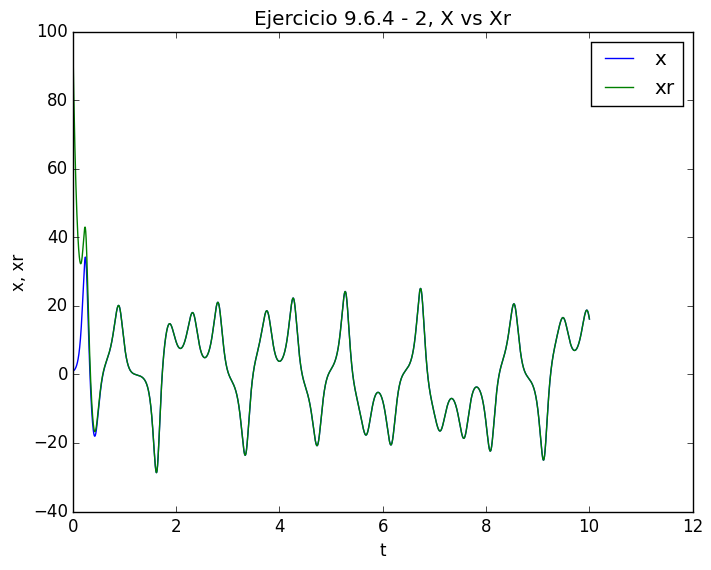

In [8]:
include("testejercicio22-xxr.jl")

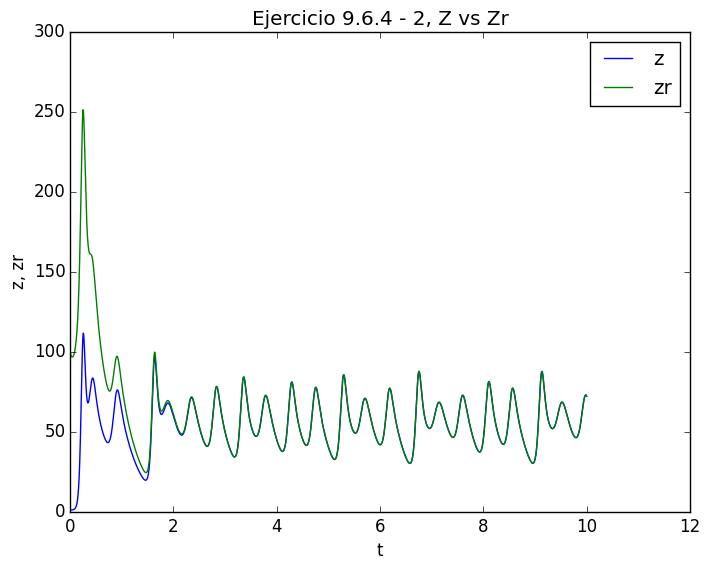

In [9]:
include("testejercicio22-zzr.jl")

#### 9.6.5 (Masking)
In their signal-masking approach, Cuomo and Oppenheim (1992, 1993) use the following receiver dynamics:

$\dot{x_r} = \sigma (y_r - x_r)$  
$\dot{y_r} = [rs(t)] - [y(r)] - [s(t)z_r]$   
$\dot{z_r} = [s(t)y_r] - [bz_r]$  

where  $s(t) = x(t) + m(t)$,  and $m(t)$ is the low-power message added to the much stronger chaotic mask $x(t)$. If the receiver has synchronized with the drive, then $x_r(t) ≈ x(t)$ and so $m(t)$ may be recovered as  $\hat{m}(t) = s(t) - x_r(t)$

Test this approach numerically, using a sine wave for $m(t)$. How close is the estimate  to the actual message $m(t)$? How does the error depend on the frequency of the sine wave?

#### Variación de Parámetros

En esta parte, se varían los parámetros a fin de conocer si el mensaje resultante cambia, es decir, si deja de existir la sincronía deseada.

Interact.Options{:ToggleButtons,Int64}(Signal{Int64}(1, nactions=0),"ρr",1,"1",Interact.OptionDict(Any["1","10","24","25","60"],Dict{Any,Any}("24"=>24,"1"=>1,"10"=>10,"25"=>25,"60"=>60)),Any[],Any[])

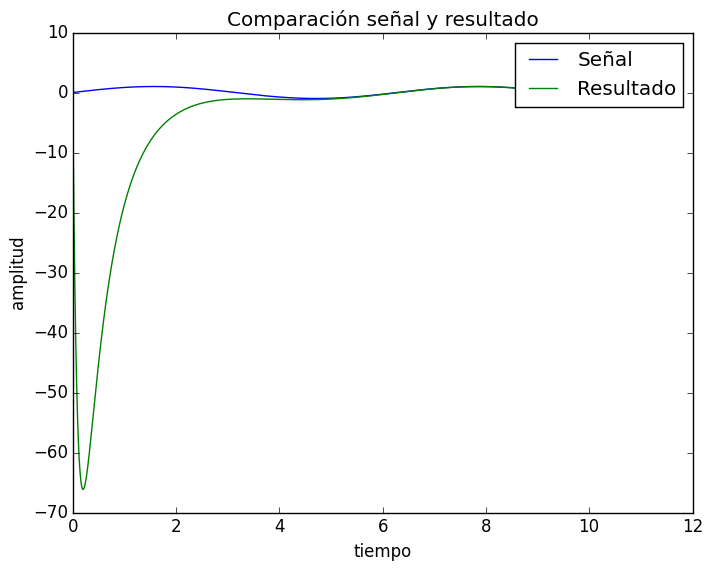

In [10]:
include("ejercicio3taylor.jl")

Como puede verse, la sincronización siempre existe, la única diferencia es el lapso de tiempo después del cual se da la sincronización.

La siguiente gráfica es sólo una muestra de este ejercicio utilizando el método de integración Runge-Kutta. A comparación de la gráfica que se mostrará más abajo, utilizando integración con Taylor, se ve que este método es menos preciso. 

Interact.Slider{Float64}(Signal{Float64}(0.041, nactions=0),"φ",0.041,0.001:0.01:0.091,true)

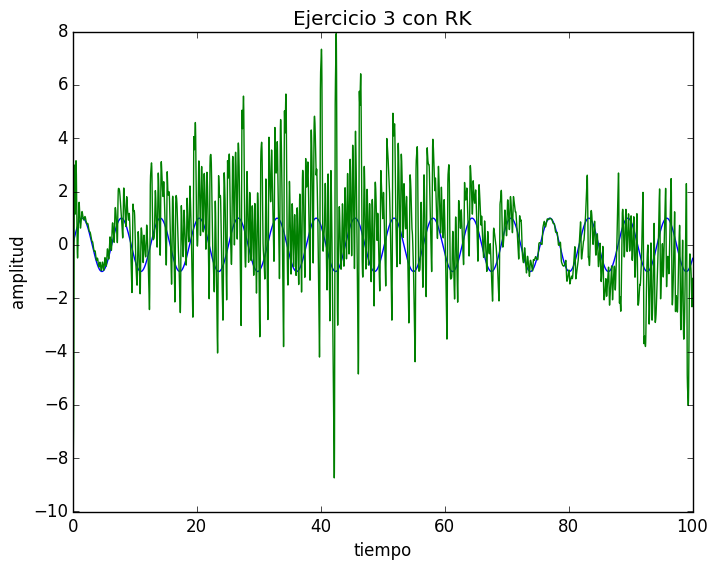

In [11]:
include("testejercicio3.jl")

#### Variación de Frecuencias

Interact.Slider{Float64}(Signal{Float64}(0.14509999999999998, nactions=0),"φ",0.14509999999999998,0.0001:0.005:0.2951,true)

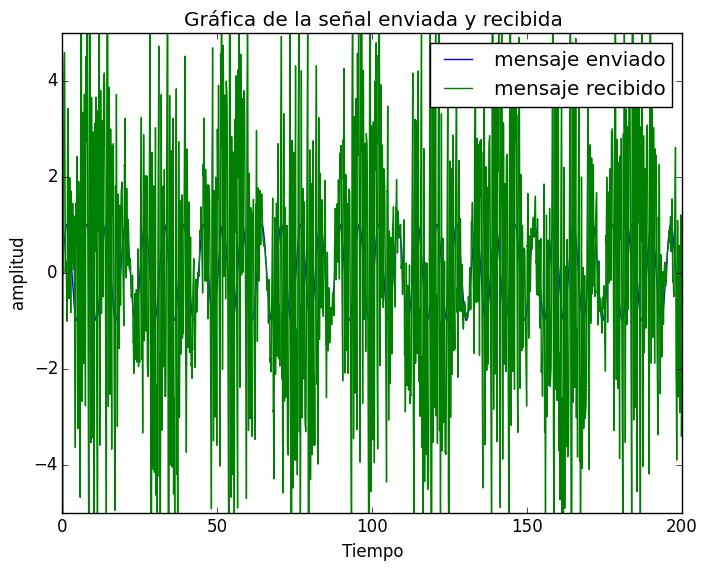

In [15]:
include("Graph34.jl")

Interact.Slider{Float64}(Signal{Float64}(0.14509999999999998, nactions=0),"φ",0.14509999999999998,0.0001:0.005:0.2951,true)

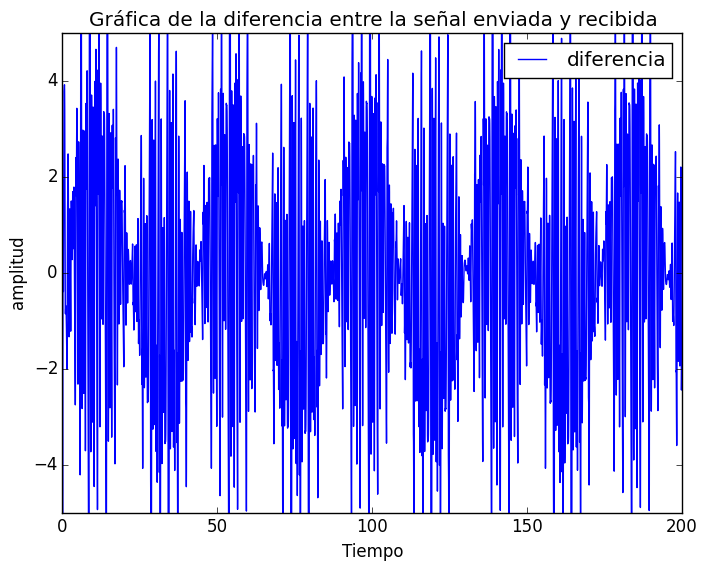

In [17]:
include("Graph35.jl")

De las gráficas anteriores, podemos observar que cuando la frecuencia es muy pequeña, el mensaje enviado y el recibido son muy parecidos. Después de un lapso pequeño de tiempo, ambas señales se sincronizan sin embargo, poco a poco la sincronía se va perdiendo (como se puede ver en la gráfica de la diferencia). Esta pérdida de sincronización creemos que se debe a errores numéricos y por el uso de un paso fijo y no uno adaptativo.

Conforme la fecuencia de la señal (seno) va aumentando, el mensaje recibido se parece menos al enviado; sin embargo, se observa que después de un cierto tiempo y con mayor frecuencia, las señales se sincronizan por un corto lapso de tiempo.

### Audio

#### Referencias:

##### Caos, Criptologia

[Nonlinear Dynamics and Chaos - Strogatz (2014)](http://libgen.io/get.php?md5=93608D1E7D48FF61D25173674AF85BD7&key=ALGOHY9BRV5DVM5D "Lib Genesis")

[Synchronization of Lorenz-Based Chaotic Circuits with Applications to Communications](http://www.rle.mit.edu/dspg/documents/SynchroofLorenz.pdf "Artículo")

[Chaos Applications in Telecommunications](http://libgen.io/get.php?md5=0C28EB7B594F94B10BDD9B9391228D85&key=OCJBN9OTSRT306XH "Lib Genesis")

[Handbook of Chaos Control](http://libgen.io/get.php?md5=97455994EC81072A20A21293532926D1&key=I33OJ1BYKTFE0R1S "Lib Genesis")

[Using Chaos to Send Secret Messages](http://bulldog2.redlands.edu/fac/joanna_bieri/nonlinear/Chotic_Messages.pdf "powerpoint")

[Edward Lorenz's Strange Attraction](https://logicaltightrope.com/2013/08/29/edward-lorenzs-strange-attraction/ "blog")

[Sending Your Secrets Safely with Chaos](https://logicaltightrope.com/2013/09/01/sending-your-secrets-safely-with-chaos/ "blog")

[A secret message from another dimension](https://web.archive.org/web/20150214122103/http://jellymatter.com/2012/01/04/a-secret-message-from-another-dimension/ "ejemplo")